# Lab | Imbalanced data | simon 11/11

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#libraries-assemble" data-toc-modified-id="libraries-assemble-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>libraries assemble</a></span></li><li><span><a href="#data-in" data-toc-modified-id="data-in-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>data in</a></span><ul class="toc-item"><li><span><a href="#Replace-churn-string-values-with-numeric-binary-values" data-toc-modified-id="Replace-churn-string-values-with-numeric-binary-values-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Replace churn string values with numeric binary values</a></span></li></ul></li><li><span><a href="#EDA-+-cleaning" data-toc-modified-id="EDA-+-cleaning-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA + cleaning</a></span></li><li><span><a href="#Check-correlations-for-numerical-columns¶" data-toc-modified-id="Check-correlations-for-numerical-columns¶-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Check correlations for numerical columns¶</a></span></li><li><span><a href="#Extract-target-variable" data-toc-modified-id="Extract-target-variable-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Extract target variable</a></span></li><li><span><a href="#Extract-independent-variables-and-scale-them." data-toc-modified-id="Extract-independent-variables-and-scale-them.-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Extract independent variables and scale them.</a></span></li><li><span><a href="#minmax-scaler" data-toc-modified-id="minmax-scaler-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>minmax scaler</a></span></li><li><span><a href="#Build-the-logistic-regression-model." data-toc-modified-id="Build-the-logistic-regression-model.-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Build the logistic regression model.</a></span></li><li><span><a href="#Evaluate-the-model" data-toc-modified-id="Evaluate-the-model-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Evaluate the model</a></span></li><li><span><a href="#Smote" data-toc-modified-id="Smote-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Smote</a></span></li><li><span><a href="#Tomek" data-toc-modified-id="Tomek-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Tomek</a></span></li><li><span><a href="#Explore-the-accuracy-score-for-the-predictions" data-toc-modified-id="Explore-the-accuracy-score-for-the-predictions-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Explore the accuracy score for the predictions</a></span></li></ul></div>

##  libraries assemble

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc, confusion_matrix

warnings.filterwarnings('ignore')

%matplotlib inline
%load_ext autoreload
%autoreload 2

## data in

In [2]:
df=pd.read_csv('/Users/AFROARC/Documents/GitHub/IronHackLabs/Week4/datasets/customer_churn.csv')

In [3]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
# Remove unecessary columns from beginning of data ('Unnamed: 0', 'customerid')
df2 = df.iloc[:,2:]
df2.head(2)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


### Replace churn string values with numeric binary values

In [7]:
df2.Churn.replace({"Yes":1, "No":0}, inplace = True)

In [8]:
df2.head(2)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0


In [12]:
round(df.describe(), 2)

,SeniorCitizen,tenure,MonthlyCharges
count,7043.00,7043.00,7043.00
mean,0.16,32.37,64.76
std,0.37,24.56,30.09
min,0.00,0.00,18.25
25%,0.00,9.00,35.50
50%,0.00,29.00,70.35
75%,0.00,55.00,89.85
max,1.00,72.00,118.75


## EDA + cleaning 
- remove nulls
- check the distribution of num var
- look for outliers 
- simplify categories - making them consistent, use UNKNOWN instead of blank
- check for multicollinearity and drop correlated columns (?)

In [55]:
df2.isna().sum()

SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Check correlations for numerical columns¶


In [56]:
corr_matrix = df2.corr()

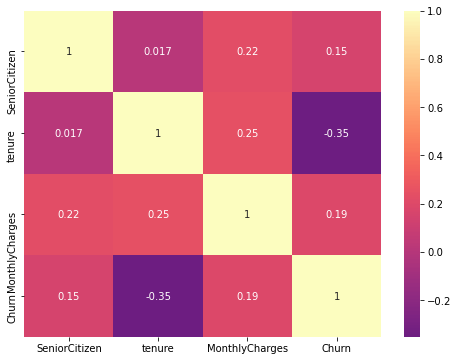

In [57]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(corr_matrix,
           cmap='magma',
           center=0,
           annot=True,
           );

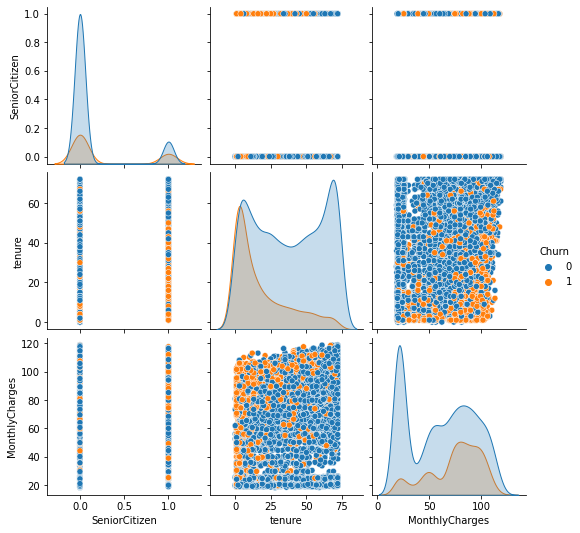

In [58]:
sns.pairplot(df2, hue='Churn');

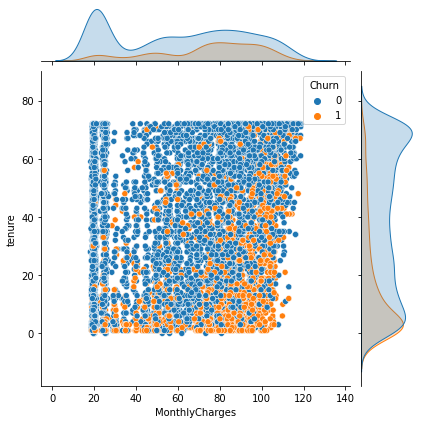

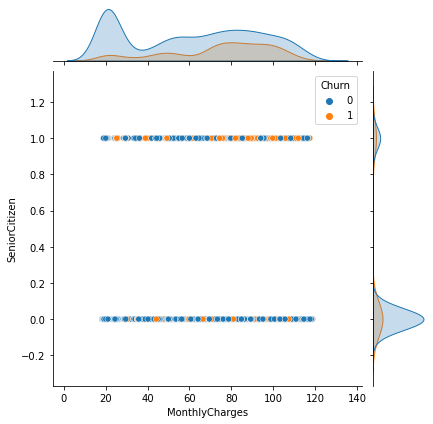

In [59]:
sns.jointplot(data=df2, x='MonthlyCharges', y = 'tenure', hue='Churn');
sns.jointplot(data=df2, x='MonthlyCharges', y = 'SeniorCitizen', hue='Churn');

## Extract target variable

In [60]:
y = df2.iloc[:,-1]

In [61]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

## Extract independent variables and scale them.


In [66]:
X = df2[['tenure','SeniorCitizen','MonthlyCharges']]

In [67]:
X

,tenure,SeniorCitizen,MonthlyCharges
0,1,0,29.85
1,34,0,56.95
2,2,0,53.85
3,45,0,42.30
4,2,0,70.70
...,...,...,...
7038,24,0,84.80
7039,72,0,103.20
7040,11,0,29.60
7041,4,1,74.40


In [68]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   SeniorCitizen   7043 non-null   int64  
 2   MonthlyCharges  7043 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 165.2 KB


## minmax scaler


In [69]:
minmax = MinMaxScaler()
X= pd.DataFrame(minmax.fit_transform(X))

In [70]:
X

,0,1,2
0,0.013889,0.0,0.115423
1,0.472222,0.0,0.385075
2,0.027778,0.0,0.354229
3,0.625000,0.0,0.239303
4,0.027778,0.0,0.521891
...,...,...,...
7038,0.333333,0.0,0.662189
7039,1.000000,0.0,0.845274
7040,0.152778,0.0,0.112935
7041,0.055556,1.0,0.558706


## Build the logistic regression model.


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [72]:
lr = LogisticRegression(max_iter=400)

In [73]:
lr.fit(X_train,y_train)

LogisticRegression(max_iter=400)

In [74]:
y_pred=lr.predict(X_test)

## Evaluate the model

In [78]:
from sklearn.linear_model import LogisticRegression #model 
from sklearn.model_selection import train_test_split #train/test split
from sklearn.metrics import confusion_matrix , plot_confusion_matrix# evaluation
from sklearn.metrics import classification_report # evaluation
from sklearn.metrics import accuracy_score

In [80]:
accuracy_score(y_test,y_pred)

0.7827733080927591

In [76]:
confusion_matrix (y_test, y_pred)

array([[1409,  144],
       [ 315,  245]])

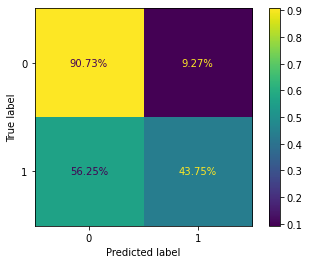

In [81]:
plot_confusion_matrix(lr, X_test,y_test,normalize='true',values_format= '.2%')
plt.show()

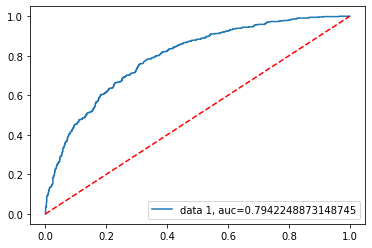

In [82]:
import sklearn.metrics as metrics
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0,1],[0,1],'r--') #adds red line to middle of the plot
plt.legend(loc=4)
plt.show()

## Smote

In [83]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [84]:
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [85]:
len(X_train)

4930

In [86]:
len(X_train_sm)

7242

In [87]:
#fit to train - smote
lr.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=400)

In [88]:
# y smote predictions
y_pred_sm=lr.predict(X_test)

In [89]:
accuracy_score(y_test,y_pred_sm)

0.7132039753904401

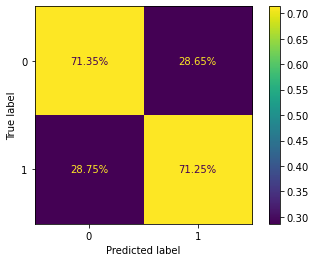

In [90]:
plot_confusion_matrix(lr,X_test,y_test,normalize='true',values_format= '.2%')

## Tomek

In [93]:
from imblearn.under_sampling import TomekLinks
tomek= TomekLinks(sampling_strategy = 'majority')

In [94]:
X_train_tk, y_train_tk = tomek.fit_resample(X_train, y_train)

In [95]:
lr.fit(X_train_tk,y_train_tk)

LogisticRegression(max_iter=400)

In [96]:
y_train_tk.value_counts()

0    3282
1    1309
Name: Churn, dtype: int64

In [97]:
y_train.value_counts()

0    3621
1    1309
Name: Churn, dtype: int64

In [98]:
y_pred_tk=lr.predict(X_test)

In [99]:
accuracy_score(y_test,y_pred_tk)

0.7681022243256034

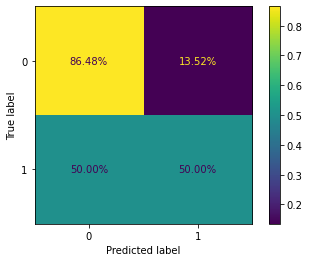

In [100]:
plot_confusion_matrix(lr,X_test,y_test,normalize='true',values_format= '.2%' )

## Explore the accuracy score for the predictions


In [102]:
# define a function to obtain the accuracy
# by changing the test and train size

def get_score(test_size, data):
    X = df2[['tenure','SeniorCitizen','MonthlyCharges']]
    y = df2.iloc[:,-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = test_size, 
                                                    random_state = 100
                                                       )
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    return accuracy_score(y_test, y_pred)

In [110]:
np.linspace(0.1, 0.9, num=17)

array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 ])

In [111]:
test_sizes = np.linspace(0.1, 0.9, num=40)

In [112]:
acc_scores = [get_score(test_size, df2) for test_size in test_sizes]

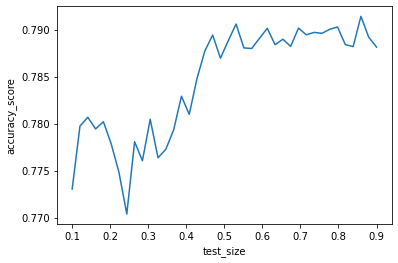

In [113]:
plt.plot(test_sizes, acc_scores)
plt.xlabel('test_size')
plt.ylabel('accuracy_score');
# Based on this we will use 0.3 as test_size 
# because it gives us the best accuracy 
# We don't need to change the test_size because it is the one
# we set at first